# Ingrate Expectations
## Why I like, but don't love, Python

#### Ravi Narasimhan - December 2015


I learned Python 2.7 in 2014 due to circumstance and need.  My colleague Al Danial organized an excellent course for our mutual employer which I supplemented with [Codeacademy](https://www.codecademy.com/learn/python) instruction.  I've used Python intermittently, growing to appreciate a lot about it and being frustrated by other aspects of this highly popular and almost completely free language and packages.  This post collects those pros and cons mostly for self-therapeutic reasons. The examples are representative but a comprehensive list would be far too large and not worth reading (or writing). I've only included issues that I can reproduce on different Python distributions.  I use [Anaconda](http://www.continuum.io) by Continuum Analytics at home and [Enthought Canopy](http://www.enthought.com) at the office.

In addition, I've updated my concerns to the extent possible by looking at the most recent documentation and at several of the most relevant Python discussion groups and listservs.  Some of the cons in my initial drafts have fallen away, these remain.  I am fully aware of "Free as in 'free speech' and not as in 'free beer' " when it comes to software.  My frustrations are not indictments. I acknowledge in advance the people and teams that make such superb tools available to me at a click.

### Executive Summary
Python has captured the imagination of some [very](https://www.continuum.io/people/travis-oliphant)  [gifted](http://www.numfocus.org/john-hunter-technology-fellowship.html) [people](http://bids.berkeley.edu/people/fernando-perez).  [Guido van Rossum's](https://www.python.org/~guido/) base language has grown since the 1990s and has been substantially enhanced and expanded by a vast set of add-in packages.  These mostly free and open source codes allow Python to be used in almost all areas of science and business at a low cost of entry.  Python can simplify many tasks and, being interpreted, is good for prototyping.  There are however quirks that can trap even the prepared and many claims are in the eye of the beholder:

- Python's clean syntax can get dirty in actual application
- Python can be difficult to learn on one's own
  - Learn-by-example is good for getting started but otherwise limiting
  - Simple tasks can require external packages
  - External packages often require frequent visits to a wide variety of support options to learn usage by example (see above)
- Packages evolve quickly and asynchronously which can lead to conflicts and/or compatibility problems
- Comparisons to commercial software such as Matlab are often uncharitable
- A major language revision has been undertaken for arcane reasons leading to difficult decisions in selecting Python 2 or Python 3


### Getting Started

A Python interpreter is often included with a modern operating system.  If not, the [Anaconda package](https://www.continuum.io/downloads) is easy to install and free of charge for most uses.  [Steve Byrnes](http://sjbyrnes.com/python/) has concise instructions.

Like venerable BASIC, it is easy to get going.  

In [1]:
### Simple things

right_out = 5  ## Define a variable
my_list = ['lambs', 'stoats', 'orangutans', 3, right_out]  ## Define a list, a basic Python data type
print (right_out*27./(65 + 52.3))  ## Do some arithmetic
print my_list[3] == ((5+11)-4)/4.  ## add a comparison 
print len(my_list)  ## How long is it?

1.15089514066
True
5


#### Python entities can be modified by methods

New methods can also be created as needed.

In [2]:
print type(my_list)   ## What kind of beast is my_list?
print id(my_list)     ## Where does it 'live' in memory?

<type 'list'>
4379766512


Lists can be transformed very quickly through list methods.

In [3]:
print dir(my_list)  ## What can we do with/to my_list?

['__add__', '__class__', '__contains__', '__delattr__', '__delitem__', '__delslice__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getslice__', '__gt__', '__hash__', '__iadd__', '__imul__', '__init__', '__iter__', '__le__', '__len__', '__lt__', '__mul__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__reversed__', '__rmul__', '__setattr__', '__setitem__', '__setslice__', '__sizeof__', '__str__', '__subclasshook__', 'append', 'count', 'extend', 'index', 'insert', 'pop', 'remove', 'reverse', 'sort']


In [4]:
my_list.sort()  ## Sort the list in-place (changes the list)
print my_list
my_list.reverse()  ## Reverse the sorted list
print my_list

[3, 5, 'lambs', 'orangutans', 'stoats']
['stoats', 'orangutans', 'lambs', 5, 3]


Python has many data types.  Some, like lists, are mutable and can be changed.  Others, such as tuples, are immutable and cannot.  Dictionaries are also very powerful but I will not be using either dictionaries or tuples in this document.

#### Python's function syntax is straightforward and recursion is built-in


In [5]:
def sumsqr(x,y):
    return ((x**2) + (y**2))
print sumsqr(3,4)

import math
def pythag(x,y):
    return math.sqrt(sumsqr(x,y))
print pythag(3,4)

25
5.0


In [6]:
## Everyone's favorite recursion example
def factorial(n):
   if n == 1:
       return n
   else:
       return n*factorial(n-1)
factorial(7)

5040

#### Looping is more versatile than most languages I've used.  

It is trivial to iterate over the elements of a list without referencing by an index.  But, the latter is also possible.

In [7]:
## No need for indices
for j in my_list:
    print j,

stoats orangutans lambs 5 3


In [8]:
##  enumerate generates an index when required
for i,j in enumerate(my_list):
    print "Item # %d is %s" % (i,j)

Item # 0 is stoats
Item # 1 is orangutans
Item # 2 is lambs
Item # 3 is 5
Item # 4 is 3


#### Python's map and filter commands make it very easy to think of transformations applied to data

I have appreciated these commands as a painless introduction to some parts of functional programming.

In [9]:
print math.exp(7)  ## exp raises the argument to the power of e

## Look Ma, no loops!
inputs = [-2, -1, 0, 1, 2]
outputs = map(math.exp, inputs)
print outputs

1096.63315843
[0.1353352832366127, 0.36787944117144233, 1.0, 2.718281828459045, 7.38905609893065]


In [10]:
def isneg(x):
    if x < 0:
        return x
    else:
        pass
print filter(isneg, inputs)

[-2, -1]


#### For some reason, Python style guides prefer the list comprehension over map and filter

Adding a condition after the 'for' statement filters data.  Otherwise, we get a 1:1 map.  I like comprehensions just fine but for my brain, map and filter are more intuitive.

In [11]:
## One-to-one mapping of a list
print [math.exp(j) for j in inputs]

[0.1353352832366127, 0.36787944117144233, 1.0, 2.718281828459045, 7.38905609893065]


In [12]:
## Subsetting a list
print [j for j in inputs if j < 0]

[-2, -1]


### But!  Python's approach to assignments is different from other languages I've used and can cause problems even for the wary

Assignments are 'by reference' not 'by value'

a = b means that b points to a's memory location.  If a changes, b changes.  This can make life very ... interesting.  This example shows methods applied to a list of lists.

In [13]:
blanks = [''] * 3 ## A powerful list generation trick
blanks

['', '', '']

In [14]:
menu = [ ['spam', 'eggs', 'bacon'],\
        ['shallots', 'aubergines', 'truffle pate']]
menu

[['spam', 'eggs', 'bacon'], ['shallots', 'aubergines', 'truffle pate']]

In [15]:
menu.append(blanks)  # Peril! 
print "Complete menu: %s" % menu
print "Last item: %s" % menu[2]

Complete menu: [['spam', 'eggs', 'bacon'], ['shallots', 'aubergines', 'truffle pate'], ['', '', '']]
Last item: ['', '', '']


In [16]:
menu[2][1] = 'Urrrrgh!' # More Peril!
print "Complete menu: %s" % menu
print "Blanks: %s" % blanks

Complete menu: [['spam', 'eggs', 'bacon'], ['shallots', 'aubergines', 'truffle pate'], ['', 'Urrrrgh!', '']]
Blanks: ['', 'Urrrrgh!', '']


The **.append** method appends a _reference_ to 'blanks' and makes it vulnerable to operations on the 'menu' variable.  In other words, we are effectively giving **.append** a memory location of the variable called 'blanks' and not the set of values that make up the variable called 'blanks'.  When we change the value of menu, the memory location of blanks and hence blanks itself gets changed.  

I expected this less than I expected the [Spanish Inquisition](https://www.youtube.com/watch?v=vt0Y39eMvpI). I've read the whys and wherefores and still don't get why the language is structured this way.

It can be gotten around...

In [17]:
blanks = [''] * 3 ## A powerful list generation trick
print "Blanks: %s" % blanks
menu = [ ['spam', 'eggs', 'bacon'],\
        ['shallots', 'aubergines', 'truffle pate']]
print "Complete menu: %s" % menu

menu.append(list(blanks))  ## list(blanks) makes blanks a list
print "Complete menu: %s" % menu
print "Last item: %s" % menu[2]

menu[2][1] = 'Urrrrgh!'
print "Complete menu: %s" % menu
print "Blanks: %s" % blanks

Blanks: ['', '', '']
Complete menu: [['spam', 'eggs', 'bacon'], ['shallots', 'aubergines', 'truffle pate']]
Complete menu: [['spam', 'eggs', 'bacon'], ['shallots', 'aubergines', 'truffle pate'], ['', '', '']]
Last item: ['', '', '']
Complete menu: [['spam', 'eggs', 'bacon'], ['shallots', 'aubergines', 'truffle pate'], ['', 'Urrrrgh!', '']]
Blanks: ['', '', '']


The **list()** command makes a copy of 'blanks' and passes the copy into **.append**.  I believe this works because the result of list(blanks) occupies a different memory location than 'blanks' itself.  It could also be done by using the **copy** or **deepcopy** functions from the **copy** package

Bottom line:  It is easy to forget this and it can be the very devil to debug. I learned this by accident while writing code for a project and it took over a day to figure out.  The final code I wrote was both more complex and harder to read than it might have been.

#### Lists can be made to look like arrays but will not be or behave as arrays

Arrays and matrices are everywhere in scientific computing.  Python's list is its major data type and the base language doesn't seem to have an array type.  So let's make something array-like out of one and slice it different ways.

In [18]:
dennis = [['Come','see', 'the'],['violence', 'inherent','in'],\
          ['the', 'system!', 'Help! Help!']]

In [19]:
dennis[0]

['Come', 'see', 'the']

In [20]:
dennis[1:]  ## A first look at the slice operator

[['violence', 'inherent', 'in'], ['the', 'system!', 'Help! Help!']]

In [21]:
dennis[1][1]

'inherent'

What if we want the first element of each row or alternately, the first column?  From similar languages, we can try to slice with the **':'** operator.

In [22]:
dennis[:][0]  ## Rows come first, span them, 
              ## and take the first element


['Come', 'see', 'the']

I was hoping for ['Come', 'violence', 'the'] and didn't get it.  dennis looks like an array but it is just a list of lists.  

Interestingly, explicitly referencing the row works.  The **':'** as used above doesn't slice like it does in other contexts.  In fairness, lists of lists don't have to have the rectangular structure of arrays so in retrospect it isn't surprising that we get this kind of a result.

In [23]:
[dennis[0][0], dennis[1][0], dennis[2][0]]

['Come', 'violence', 'the']

We do have options for generating and manupulating numeric and character arrays.

In [24]:
import numpy as np
testarray = np.arange(9).reshape(3,3)
testarray

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [25]:
testarray[:,1]  ## We can get a column easily

array([1, 4, 7])

In [26]:
testarray[2,:]  ## Syntax holds for rows

array([6, 7, 8])

In [27]:
dennis_array = np.array([['Come','see', 'the'],['violence', 'inherent','in'],\
          ['the', 'system!', 'Help! Help!']])

In [28]:
dennis_array  ## Works for strings

array([['Come', 'see', 'the'],
       ['violence', 'inherent', 'in'],
       ['the', 'system!', 'Help! Help!']], 
      dtype='|S11')

In [29]:
type(dennis_array)  ## Still an ndarray

numpy.ndarray

In [30]:
dennis_array[:,0]  ## It works for columns

array(['Come', 'violence', 'the'], 
      dtype='|S11')

In [31]:
dennis_array[1,:]  ## and rows

array(['violence', 'inherent', 'in'], 
      dtype='|S11')

If we try this with the initial list called 'dennis', we get an error.  So this kind of array indexing is made possible through the design of **numpy** and its **array** data type.

In [32]:
dennis[:,1]

TypeError: list indices must be integers, not tuple

### The Immigration Question
Python, like many nations, relies on imports to do heavy lifting and to keep its economy moving.  The few simple examples above required bringing in additional capabilities in the form of packages through the 'import' command.  We required **math** for square roots, **numpy** to handle arrays, and the  use of **list**, **copy**, and/or **deepcopy** to deal with arguments passed as references.  If we wanted to work with the filesystem, we'd need **os**, possibly **glob**, and probably **sys**.

The first part of reading or writing any substantial Python code is the list of imports.   [Numpy](http://www.numpy.org)  defines a powerful n-dimensional array datatype and methods and functions to create and manipulate them.  [Matplotlib](http://www.matplotlib.org), [Bokeh](http://bokeh.pydata.org/en/latest/), and [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/) offer 2-D plotting and data visualization, and the [Sympy](http://www.sympy.org) library wraps Python around symbolic mathematics tools.  Each of these free packages represents untold person-years of work and there are [over 71000 packages as of this writing.](https://pypi.python.org/pypi).

Packages are at varying levels of maturity, created mostly by volunteer developers collaborating across continents.  Some documentation sets are superb; [XLSXWriter](http://xlsxwriter.readthedocs.org) allows Python to create and manipulate Excel spreadsheets.  Other vital packages have little to no documentation.  Interfacing Python to Windows internals offers great possibilities for directly controlling MS Office applications, for example.  The [pywin32](http://starship.python.net/~skippy/) package which can enable this is tersely documented, to say the least. 

#### Known and Unknown unknowns
So, how do we know what's out there and how do we learn to use it?  Necessity is a powerful motivator.  We come across a problem, we ask an experienced colleague, or we search the web.  The latter will turn up links to a variety of [mailing lists](https://www.python.org/community/lists/), [Usenet newsgroups](https://groups.google.com/forum/#!forum/comp.lang.python), blogs, and Q&A sites like [stackexchange.com](http://programmers.stackexchange.com/questions/tagged/python) and [stackoverflow.com](http://stackoverflow.com/questions/tagged/python).  We'll often find answers here:  Import this package, invoke these methods, beware of these pitfalls.  If we don't, we spend some time going through the rest of the offerings, learning cultural norms, signing up, and asking our own questions.  If we ask properly and show due diligence, we'll get a quick, most often pleasant answer.  Sometimes we'll get snark but that's the way of the world.

All this assumes constant, high speed access to the Internet and the ability to download and install packages at will.  This is not a given for users in corporate environments where certain types of Internet use can be forbidden and where [IT departments](http://dilbert.com/search_results?terms=mordac)  control software installations.

Getting the answer and moving on is satisfying in the short term but we wonder what else we don't know enough to seek on our own.  What else could that package do?  Where can I learn about it?  The fragmentation of the Python developer base makes this an unsolved problem.  There are fine tutorials and recipes aplenty to get oriented.  Getting a strong foundation in a package and building up our own knowledge, especially to the level of supporting development and helping others, is tough.  

#### Introspection
It is possible to get some information on a package's contents within a Python session.  If we are using the IPython shell and kernel, the tab key will provide a dropdown list of available options given a fragment of a package/method.  There are also assorted commands that can print a list.

In [33]:
import os  ## The operating system module
available = dir(os)
print available

['EX_CANTCREAT', 'EX_CONFIG', 'EX_DATAERR', 'EX_IOERR', 'EX_NOHOST', 'EX_NOINPUT', 'EX_NOPERM', 'EX_NOUSER', 'EX_OK', 'EX_OSERR', 'EX_OSFILE', 'EX_PROTOCOL', 'EX_SOFTWARE', 'EX_TEMPFAIL', 'EX_UNAVAILABLE', 'EX_USAGE', 'F_OK', 'NGROUPS_MAX', 'O_APPEND', 'O_ASYNC', 'O_CREAT', 'O_DIRECTORY', 'O_EXCL', 'O_EXLOCK', 'O_NDELAY', 'O_NOCTTY', 'O_NOFOLLOW', 'O_NONBLOCK', 'O_RDONLY', 'O_RDWR', 'O_SHLOCK', 'O_SYNC', 'O_TRUNC', 'O_WRONLY', 'P_NOWAIT', 'P_NOWAITO', 'P_WAIT', 'R_OK', 'SEEK_CUR', 'SEEK_END', 'SEEK_SET', 'TMP_MAX', 'UserDict', 'WCONTINUED', 'WCOREDUMP', 'WEXITSTATUS', 'WIFCONTINUED', 'WIFEXITED', 'WIFSIGNALED', 'WIFSTOPPED', 'WNOHANG', 'WSTOPSIG', 'WTERMSIG', 'WUNTRACED', 'W_OK', 'X_OK', '_Environ', '__all__', '__builtins__', '__doc__', '__file__', '__name__', '__package__', '_copy_reg', '_execvpe', '_exists', '_exit', '_get_exports_list', '_make_stat_result', '_make_statvfs_result', '_pickle_stat_result', '_pickle_statvfs_result', '_spawnvef', 'abort', 'access', 'altsep', 'chdir', 'ch

There's more to it.  This is a branched tree.

In [34]:
print(dir(os.chmod))  ## No further branches to this

['__call__', '__class__', '__cmp__', '__delattr__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__le__', '__lt__', '__module__', '__name__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__self__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']


In [35]:
print(dir(os.path))  ## But, os.path has branches

['__all__', '__builtins__', '__doc__', '__file__', '__name__', '__package__', '_joinrealpath', '_unicode', '_uvarprog', '_varprog', 'abspath', 'altsep', 'basename', 'commonprefix', 'curdir', 'defpath', 'devnull', 'dirname', 'exists', 'expanduser', 'expandvars', 'extsep', 'genericpath', 'getatime', 'getctime', 'getmtime', 'getsize', 'isabs', 'isdir', 'isfile', 'islink', 'ismount', 'join', 'lexists', 'normcase', 'normpath', 'os', 'pardir', 'pathsep', 'realpath', 'relpath', 'samefile', 'sameopenfile', 'samestat', 'sep', 'split', 'splitdrive', 'splitext', 'stat', 'supports_unicode_filenames', 'sys', 'walk', 'warnings']


In [36]:
print(dir(os.path.warnings))  ## This sub-sub-function has functions

['WarningMessage', '_OptionError', '__all__', '__builtins__', '__doc__', '__file__', '__name__', '__package__', '_getaction', '_getcategory', '_processoptions', '_setoption', '_show_warning', 'catch_warnings', 'default_action', 'defaultaction', 'filters', 'filterwarnings', 'formatwarning', 'linecache', 'once_registry', 'onceregistry', 'resetwarnings', 'showwarning', 'simplefilter', 'sys', 'types', 'warn', 'warn_explicit', 'warnpy3k']


I haven't been able to find a simple way of recursively listing a package's contents just to get the lay of the land.

How about the vital matplotlib plotting package?

In [37]:
import matplotlib as mpl
print(dir(mpl))

['RcParams', 'URL_REGEX', 'Verbose', '_DATA_DOC_APPENDIX', '__builtins__', '__doc__', '__file__', '__name__', '__package__', '__path__', '__version__', '__version__numpy__', '_all_deprecated', '_create_tmp_config_dir', '_decode_filesystem_path', '_deprecated_ignore_map', '_deprecated_map', '_error_details_fmt', '_get_cachedir', '_get_config_or_cache_dir', '_get_configdir', '_get_data_path', '_get_data_path_cached', '_get_home', '_get_xdg_cache_dir', '_get_xdg_config_dir', '_is_writable_dir', '_obsolete_set', '_open_file_or_url', '_python26', '_rc_params_in_file', '_replacer', '_url_lines', '_use_error_msg', '_version', 'absolute_import', 'bad_pyparsing', 'cbook', 'chain', 'checkdep_dvipng', 'checkdep_ghostscript', 'checkdep_inkscape', 'checkdep_pdftops', 'checkdep_ps_distiller', 'checkdep_tex', 'checkdep_usetex', 'checkdep_xmllint', 'colors', 'compare_versions', 'compat', 'contextlib', 'converter', 'cycler', 'dateutil', 'dedent', 'default', 'defaultParams', 'default_test_modules', 'dis

None of these commands looks like it ingests or displays data.  So, how do we proceed?  We search for a tutorial and find
http://matplotlib.org/users/pyplot_tutorial.html
which points us to matplotib.pyplot, a useful collection of functions to make matplotlib work like Matlab.  The **'.'** reference tells us this is part of matplotlib.

But, the directory listing, which _should_ show us what matplotlib contains, doesn't show pyplot as an option!  We have to somehow learn of pyplot's existence, import it, and use it.  This happens in other packages as well.  Just because we can't find something doesn't mean it isn't there.  Absence of evidence...  [it's a rum thing](http://www.azquotes.com/quote/646172).

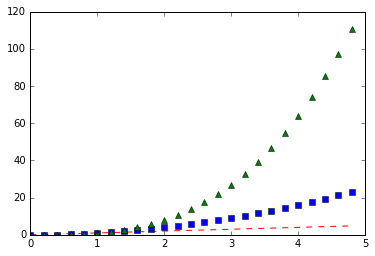

In [38]:
## Taken from the pyplot tutorial
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)

# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()


Matplotlib and pyplot implement a figure generation system similar to Matlab's handle graphics.  A figure consists of a parent object with a hierarchy of child parameters that define the content and formatting.  

If we want to know the details, the [External Resources](http://matplotlib.org/resources/index.html) page points to Benjamin Root's multipart video series, [The Anatomy of Matplotlib](http://matplotlib.org/resources/index.html).  Alternately, Chapter 12 of the comprehensive [User's manual](http://matplotlib.org/Matplotlib.pdf) shows how the parts of a figure relate to one another.

#### Matlab bashing
Many Python packages such as Numpy, Scipy, and Matplotlib take cues from the venerable [Matlab](http://www.mathworks.com) system.  They are not direct copies but they attempt to at least match features and interfaces where appropriate.  There is an unfortunate tendency among some Python adherents to take potshots at Matlab.  It is expensive, proprietary, its language inelegant, it lacks namespaces, it requires semicolons after assignments.  I choose Python for tasks involving strings, manipulating mixed data types, and simple GUIs (through widgets).  I lean toward Matlab for array and signal processing.  Occasionally I send data back and forth and use each for its strengths. 

Just as Python advocates speak to the language's subjective beauty, Matlab's IDE fits my hand like a well made tool.  It has the right amount of power for my needs, is laid out intelligently, the editor/debugger works intuitively, and it is possible to document work with its own [MS-Word based notebook](http://www.mathworks.com/help/matlab/matlab_prog/create-a-matlab-notebook-with-microsoft-word.html?s_tid=gn_loc_drop).  I am no fan of Ribbons but the Mathworks implementation is as good as I have seen of one.  Since  Matlab is built for and around array manipulation and it handles arrays growing and shrinking quietly and in the background.  Though the scripting language may not win any beauty contests, it works 'well enough' and has been stable for over twenty years.

The IPython/Jupyter Notebook is unreservedly powerful.  I failed in my first try at learning Python when I wrote scripts in editors and ran them from command lines.  Notebook was instrumental in helping me to learn the language by doing and fixing mistakes on the fly.  [Spyder](https://github.com/spyder-ide) and [Canopy](https://www.enthought.com/products/canopy/canopy-python-debugger/) offer capable environments.  I am grappling with [Pycharm](http://jetbrains.com/pycharm)'s vast features.  My work does not need the firepower of a developer suite tightly integrated with repositories but I am intrigued by its ability to import and work with Notebooks.  If debugging were added to this integration, I don't think it is there yet, I'd go through the considerable effort to get my employer to allow its use.

Matlab Toolboxes are available in many areas where Python does not (yet) play.  While [scipy.signal](http://docs.scipy.org/doc/scipy/reference/tutorial/signal.html) has some signal processing functions, Matlab's Signal Processing Toolbox is far more complete.  There is no Python equivalent of the vast Simulink dynamic simulation system.

Matlab's documentation is consistently dry but always comprehensive and the [Matlab File Exchange](http://www.mathworks.com/matlabcentral/fileexchange/) has some sharp customers on it.  Most toolbox .m files are accessible up to the point where optimized compiled routines are called for speed.  Python packages are  very transparent but as an interpreted language many important submodules can be coded in C, C++, or other languages.  Delving into Python code often goes only so far.  

Neither Python nor Matlab is perfect, neither holds any kind of moral high ground.  There is plenty of room for both business and development models.

#### Rampant development
Major Python packages constantly evolve and release minor and major updates on their own schedules.  The IPython Notebook interface has grown so popular it has evolved and amicably branched into the [Jupyter Project](http://www.jupyter.org) which allows running kernels from other languages such as [Julia](http://julialang.org), [R](https://www.r-project.org), and [Ruby](https://www.ruby-lang.org/en/).  Jupyter and IPython are developing separately and in parallel and backward compatibility isn't always assured.  [Nikolay Koldunov's earthpy.org](http://earthpy.org/pyncview_pm.html) site showed how to use the poorly known IPython.html.widgets package to dramatically simplify interactive visualizations within an IPython notebook.  Since that article was written in April 2014, IPython.html.widgets has been deprecated in favor of the emerging [ipywidgets](https://github.com/ipython/ipywidgets) module which has slightly different syntax.  The good news is that ipywidgets is a high priority item but the formal documentation will take time until the module stabilizes and existing code will have to be rewritten with such documentation as is available.

As the Jupyter project grows in size and ambition to change the world through open data science, it would be nice if some local issues were addressed.  
- Notebook cells aren't as nestable/collapsable/selectable as in Mathematica
- Large cells, whether for input or output, can be unwieldy especially on laptops where vertical space is at a premium
- The default User Interface could provide more contrast and 'situational awareness.'  It can be easy to lose one's place, move before a cell has finished executing, and inadvertently modify or execute the wrong cell
- The Notebook makes jumping around and experimenting easy.  This can lead to functions being modified and 'loss of lock' when one wants a function definition as it currently stands

  import inspect  
  print inspect.getsource(function)  
  
  does the job so I hope building it in isn't too difficult

On the refrain of documentation, it is certainly possible to customize a Notebook's appearance (styling) through a CSS file.  This post follows [Chris Holdgraf's instructions](http://predictablynoisy.com/blogging-in-wordpress-with-ipython-jupyter-notebooks/): Convert a Notebook to basic HTML, update Wordpress's CSS on the Webhost using the provided items, and then upload the HTML to the site.  

There are [many](http://www.damian.oquanta.info/posts/48-themes-for-your-ipython-notebook.html) [fine](http://blog.henryhhammond.com/theming-ipython/) [examples](http://nbviewer.ipython.org/github/ketch/teaching-numerics-with-notebooks/blob/master/Styling_notebooks.ipynb) of CSS mods at least for IPython Notebooks but no comprehensive guide to what is open for modification in CSS and/or how to implement it.  I tried to tweak some aspects of the appearance of this post but couldn't make the changes consistently across elements.  I trust that Notebook styling is still possible in Jupyter but haven't verified it.

### Python 2 vs. Python 3
I've used Python 2.7 consistently.  I've tried very hard to understand [why Python 3 was needed](http://python-notes.curiousefficiency.org/en/latest/python3/questions_and_answers.html) and why some backward incompatibility is inevitable.  [I've tried](https://docs.python.org/3/whatsnew/3.0.html)  and [I've failed](http://www.snarky.ca/why-python-3-exists).  The main reason appears to be how each handles strings -  Python 3 makes all strings Unicode by default to make life easier for programmers who speak other (human) languages.  I don't understand why this is important to scientific computing especially when the rest of the Python language is in a variant of English to begin with.  Properly handling Windows UNC filepaths due to differing uses of the backslash character would have made a bigger difference to me.  The print command also becomes a function and the division operator '/' becomes floating point by default in Python 3.  Yet these seemingly innocuous changes have resulted in two distinct versions of the language instead of a routine update.

The transition has taken a long time and it is not clear if all packages and modules, especially the arcane but useful ones, will get reworked into the new language.  The package migration has caused an [uneasy stalemate](https://jakevdp.github.io/blog/2013/01/03/will-scientists-ever-move-to-python-3/).  People won't move until some package does, package developers won't invest the time to recode and retest if people won't move. 

Just what the world needs, another schism.

### "A little cheese with your whine, Monsieur?"
It does take a lot of gall to highlight flaws in a major gift, offered in a generous spirit.  The most impressive thing about Python to me is not so much the language but how it has inspired so many sharp young minds to devote the most productive years of their lives to creating, maintaining, and growing the packages which endows Python with such power.  Free and Open Source works because people release their creations and build on the work of others.  Don't like something?  Grab the repository and have at the code and/or the documentation.  

But, it takes expertise and knowledge to not be dangerous.  Doubly so with documentation - you can't teach others what you do not yourself know.  Those who understand the system fix problems as they arise.  Those that don't are unlikely to be of much help except as financial donors to helpful packages.  If there's a way to develop the foundation to be a part of the solution as opposed to part of the precipitate, I'm all ears.
